In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# loading the data set
#MAKE SURE PATH IS GOOD!
songs = pd.read_csv("D:\\Fontys Classes\\ADS\\Project\\songs_mbid_records.csv", sep=',',engine='python')
mentions = pd.read_csv("D:\\Fontys Classes\\ADS\\Project\\first_2k_songs_appended.csv", sep=',',engine='python')

songs.head(5)


,_id,artist,title,mbid
0,588008496911806467,['James Fortune & FIYA'],Live Though It,3cd89446-1133-44ca-a012-226fd562e105
1,588008500317544449,['Wings'],Aku Pun Tahu,b265efb3-17ff-4d1e-a5c4-cdc3b6852003
2,588008500594401280,['This Eternal Cold'],Too Dead to Dream,43ce2582-4366-4e6d-ac06-8cacab50bea2
3,588008516163661824,['Solo'],Luv-All-Day,bd5790a1-0dc3-4eed-a4fb-3848b9738e35
4,588008523151335425,['Hurts'],"Blood, Tears & Gold (Lotus Eaters on My Mind r...",9c8da8a8-0a30-4930-ac9b-a1995b7bdfc2


In [3]:
# mentions_total = pd.DataFrame(columns=['artist', 'title', 'mbid', 'totalHits'])
# i = 0
# for index_s,row_s in songs.iterrows():
    # total_mentions = 0
    # if i == 2000:
        # break;
    # for index_m,row_m in mentions.iterrows():
     #   if row_m['mbid'] == row_s['mbid']:
           # total_mentions += row_m['mentions']
            
    # mentions_total.loc[i] = [row_s['artist'], row_s['title'], row_s['mbid'], total_mentions]
    # i += 1
        
# mentions_total.head(5)

In [4]:
total_mentions_per_day = mentions.groupby(['mbid', 'day'])['mentions'].sum()
total_mentions_per_day.head(20)

mbid                                  day                
00489b13-99b0-4159-9b29-31d199926a5e  2015-04-09             1
                                      2015-04-09 00:00:00    0
                                      2015-04-10 00:00:00    0
                                      2015-04-11 00:00:00    0
                                      2015-04-12 00:00:00    0
                                      2015-04-13 00:00:00    0
                                      2015-04-14             1
                                      2015-04-14 00:00:00    0
00832e6f-c3de-4ef2-af60-35f12d34d563  2015-04-14             1
00bc7cfb-709c-4900-9e78-c420d937b1ad  2015-04-09             1
                                      2015-04-10             0
                                      2015-04-11             0
                                      2015-04-12             0
                                      2015-04-13             0
                                      2015-04-14            

In [5]:
sorted_dates = mentions.sort(['mbid','day'])
sorted_dates.head(10)
print(sorted_dates.count())


mbid        17288
day         17288
mentions    17288
dtype: int64


In [6]:
sorted_dates.drop_duplicates(['day'])
sorted_dates.head()

,mbid,day,mentions
8639,00489b13-99b0-4159-9b29-31d199926a5e,2015-04-09,1
13919,00489b13-99b0-4159-9b29-31d199926a5e,2015-04-09 00:00:00,0
13920,00489b13-99b0-4159-9b29-31d199926a5e,2015-04-10 00:00:00,0
13921,00489b13-99b0-4159-9b29-31d199926a5e,2015-04-11 00:00:00,0
13922,00489b13-99b0-4159-9b29-31d199926a5e,2015-04-12 00:00:00,0


In [7]:
sorted_dates.count()

mbid        17288
day         17288
mentions    17288
dtype: int64

In [8]:
sorted_dates['day'] = pd.to_datetime(sorted_dates['day'])
sorted_dates.head(10)

,mbid,day,mentions
8639,00489b13-99b0-4159-9b29-31d199926a5e,2015-04-09,1
13919,00489b13-99b0-4159-9b29-31d199926a5e,2015-04-09,0
13920,00489b13-99b0-4159-9b29-31d199926a5e,2015-04-10,0
13921,00489b13-99b0-4159-9b29-31d199926a5e,2015-04-11,0
13922,00489b13-99b0-4159-9b29-31d199926a5e,2015-04-12,0
13923,00489b13-99b0-4159-9b29-31d199926a5e,2015-04-13,0
8640,00489b13-99b0-4159-9b29-31d199926a5e,2015-04-14,1
13924,00489b13-99b0-4159-9b29-31d199926a5e,2015-04-14,0
3600,00832e6f-c3de-4ef2-af60-35f12d34d563,2015-04-14,1
3743,00bc7cfb-709c-4900-9e78-c420d937b1ad,2015-04-09,1


In [9]:
import seaborn as sns

one_song = sorted_dates[sorted_dates.mbid == 'c6cf4924-75b7-40b3-8d66-f50ff8aec30e']
one_song.head()

,mbid,day,mentions
2271,c6cf4924-75b7-40b3-8d66-f50ff8aec30e,2015-04-07,136
2270,c6cf4924-75b7-40b3-8d66-f50ff8aec30e,2015-04-08,433
2272,c6cf4924-75b7-40b3-8d66-f50ff8aec30e,2015-04-09,473
2273,c6cf4924-75b7-40b3-8d66-f50ff8aec30e,2015-04-10,387
2274,c6cf4924-75b7-40b3-8d66-f50ff8aec30e,2015-04-11,323


In [10]:
sorted_dates.mentions = sorted_dates.mentions.astype(int)
sorted_dates.dtypes

mbid                object
day         datetime64[ns]
mentions             int32
dtype: object

In [11]:
sorted_dates['day'] = sorted_dates['day'].map(lambda x: x.day)
sorted_dates.head()


,mbid,day,mentions
8639,00489b13-99b0-4159-9b29-31d199926a5e,9,1
13919,00489b13-99b0-4159-9b29-31d199926a5e,9,0
13920,00489b13-99b0-4159-9b29-31d199926a5e,10,0
13921,00489b13-99b0-4159-9b29-31d199926a5e,11,0
13922,00489b13-99b0-4159-9b29-31d199926a5e,12,0


In [25]:
one_song = sorted_dates[sorted_dates.mbid == 'c6cf4924-75b7-40b3-8d66-f50ff8aec30e']
one_song.head()

,mbid,day,mentions
2271,c6cf4924-75b7-40b3-8d66-f50ff8aec30e,7,136
2270,c6cf4924-75b7-40b3-8d66-f50ff8aec30e,8,433
2272,c6cf4924-75b7-40b3-8d66-f50ff8aec30e,9,473
2273,c6cf4924-75b7-40b3-8d66-f50ff8aec30e,10,387
2274,c6cf4924-75b7-40b3-8d66-f50ff8aec30e,11,323


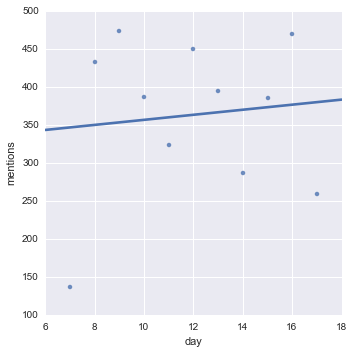

In [26]:
# Visualize the possible regression line using seaborn
sns.lmplot('day', 'mentions', data=one_song, ci=None)

In [14]:
from sklearn.linear_model import LinearRegression

X = one_song[['day']].values
y = one_song['mentions'].values

# Apply Regression to only one song

slr = LinearRegression()
slr.fit(X,y)
print('Slope: %.3f' %slr.coef_[0])
print('Intercept: %.3f' %slr.intercept_)

Slope: 3.327
Intercept: 323.345


In [15]:
one_song = sorted_dates[sorted_dates.mbid == '23ceb24d-eebd-43bb-8643-cdd5c00798af']

X = one_song[['day']].values
y = one_song['mentions'].values

slr = LinearRegression()
slr.fit(X,y)
print('Slope: %.3f' %slr.coef_[0])
print('Intercept: %.3f' %slr.intercept_)

Slope: 7.100
Intercept: 159.527


In [16]:
grouped_mbid = sorted_dates.groupby(['mbid'])

regs_songs = []     # will be used to store the regression models of each song
mbid_slr = []       # 

# Applying Regression to the 2 000 songs
for d,m in grouped_mbid:
    one_song = sorted_dates[sorted_dates.mbid == d]
    X = one_song[['day']].values
    y = one_song['mentions'].values

    slr = LinearRegression()
    slr.fit(X,y)
    regs_songs.append(slr)
    mbid_slr.append([d,slr])
    
len(mbid_slr)

2000

In [17]:
len(regs_songs)

2000

In [18]:
counter = 0;
inter_slope = []

for slr in regs_songs:
        inter_slope.append([slr.coef_[0], slr.intercept_])

len(inter_slope)

2000

In [19]:
df_mbid = pd.DataFrame(mbid_slr, columns=['mbid', 'slr'])
df_mbid.head()

,mbid,slr
0,00489b13-99b0-4159-9b29-31d199926a5e,"LinearRegression(copy_X=True, fit_intercept=Tr..."
1,00832e6f-c3de-4ef2-af60-35f12d34d563,"LinearRegression(copy_X=True, fit_intercept=Tr..."
2,00bc7cfb-709c-4900-9e78-c420d937b1ad,"LinearRegression(copy_X=True, fit_intercept=Tr..."
3,00e96621-65ac-459b-ab67-8380ade6e726,"LinearRegression(copy_X=True, fit_intercept=Tr..."
4,00fab606-7d8c-4bdd-af99-494124f31274,"LinearRegression(copy_X=True, fit_intercept=Tr..."


In [20]:
df_slope = pd.DataFrame(inter_slope, columns=['Slope', 'Intercept'])
df_slope.head()
df_slope.dtypes

Slope        float64
Intercept    float64
dtype: object

In [21]:
frames = [df_mbid, df_slope]
new_df = pd.concat(frames, axis=1)
new_df.head(10)

,mbid,slr,Slope,Intercept
0,00489b13-99b0-4159-9b29-31d199926a5e,"LinearRegression(copy_X=True, fit_intercept=Tr...",0.000000,0.250000
1,00832e6f-c3de-4ef2-af60-35f12d34d563,"LinearRegression(copy_X=True, fit_intercept=Tr...",0.000000,1.000000
2,00bc7cfb-709c-4900-9e78-c420d937b1ad,"LinearRegression(copy_X=True, fit_intercept=Tr...",0.083333,-0.638889
3,00e96621-65ac-459b-ab67-8380ade6e726,"LinearRegression(copy_X=True, fit_intercept=Tr...",0.000000,1.000000
4,00fab606-7d8c-4bdd-af99-494124f31274,"LinearRegression(copy_X=True, fit_intercept=Tr...",0.154762,-1.309524
5,010bb2c4-fd7f-450d-92eb-cb5f1810884b,"LinearRegression(copy_X=True, fit_intercept=Tr...",0.278788,-1.484848
6,0111319a-e8e0-47c5-a38e-deb11c170852,"LinearRegression(copy_X=True, fit_intercept=Tr...",-1.000000,15.000000
7,014d4180-3657-4aa1-8d09-519a1a000fe8,"LinearRegression(copy_X=True, fit_intercept=Tr...",-0.318182,8.818182
8,01817ed9-22b7-4ebc-bdf4-42f6ef578169,"LinearRegression(copy_X=True, fit_intercept=Tr...",-0.004777,0.864650
9,018b793d-6d28-4ba6-b628-cf7ae995cbec,"LinearRegression(copy_X=True, fit_intercept=Tr...",0.000000,0.285714


In [22]:
new_df.drop('slr', 1, inplace=True)
new_df.head()

,mbid,Slope,Intercept
0,00489b13-99b0-4159-9b29-31d199926a5e,0.000000,0.250000
1,00832e6f-c3de-4ef2-af60-35f12d34d563,0.000000,1.000000
2,00bc7cfb-709c-4900-9e78-c420d937b1ad,0.083333,-0.638889
3,00e96621-65ac-459b-ab67-8380ade6e726,0.000000,1.000000
4,00fab606-7d8c-4bdd-af99-494124f31274,0.154762,-1.309524


In [27]:
# Saving the above table to csv file
# new_df.to_csv('mbid_s_i.csv', sep=',', encoding='utf-8')

In [28]:
one_s = songs[songs.mbid == 'cb2cc207-8125-445c-9ef9-6ea44eee959a']
one_s.head()

,_id,artist,title,mbid
380,588010500350484481,['Ed Sheeran'],Thinking Out Loud,cb2cc207-8125-445c-9ef9-6ea44eee959a


In [31]:
one_song = sorted_dates[sorted_dates.mbid == '1a58e29e-be4d-4d93-952a-5e8f544e55a7']
one_song.head()

,mbid,day,mentions
12368,1a58e29e-be4d-4d93-952a-5e8f544e55a7,13,10
12370,1a58e29e-be4d-4d93-952a-5e8f544e55a7,14,4
12371,1a58e29e-be4d-4d93-952a-5e8f544e55a7,15,6
12369,1a58e29e-be4d-4d93-952a-5e8f544e55a7,16,2
12372,1a58e29e-be4d-4d93-952a-5e8f544e55a7,17,3


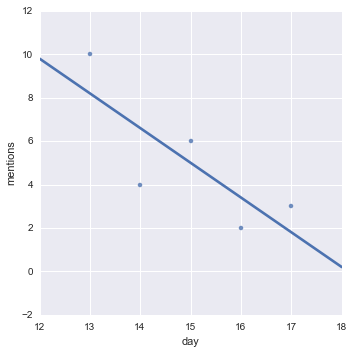

In [32]:
sns.lmplot('day', 'mentions', data=one_song, ci=None)

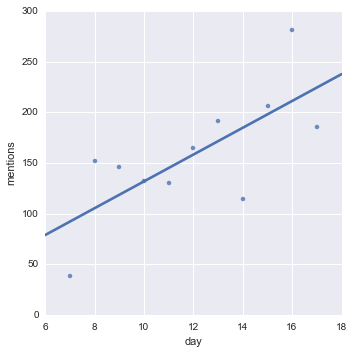

In [34]:

one_song = sorted_dates[sorted_dates.mbid == 'a0d55631-bcb2-4bd7-8ad2-f981e2b081a7']
one_song.head()
sns.lmplot('day', 'mentions', data=one_song, ci=None)